In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [3]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [4]:
# Loading the dataset 

data = pd.read_csv("C:/Users/Adamin/Desktop/DMML-Project/Cholesterol/cardio_train.csv", sep=";")

In [5]:
# Cleaning the data and removing the duplicate values

data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

68983

In [6]:
data.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68983 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68983 non-null  int64  
 1   gender       68983 non-null  int64  
 2   height       68983 non-null  int64  
 3   weight       68983 non-null  float64
 4   ap_hi        68983 non-null  int64  
 5   ap_lo        68983 non-null  int64  
 6   cholesterol  68983 non-null  int64  
 7   gluc         68983 non-null  int64  
 8   smoke        68983 non-null  int64  
 9   alco         68983 non-null  int64  
 10  active       68983 non-null  int64  
 11  cardio       68983 non-null  int64  
 12  bmi          68983 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


In [8]:
#Assigning the target variable

target_name = 'cardio'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

In [9]:
#Categorical columns 

body = ['age', 'gender', 'height', 'weight']
disease = ['ap_hi', 'ap_lo', 'cholesterol', 'gluc']
health = ['active']
habit = ['smoke', 'alco']

In [10]:
train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [11]:
train.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
28537,20443,2,175,85.0,152,90,2,1,1,0,1,27.755102
17899,18398,1,162,60.0,120,80,1,2,1,1,1,22.862369
66186,15845,1,156,114.0,140,90,1,1,1,0,1,46.844181
48069,18236,1,170,87.0,120,60,3,3,0,0,1,30.103806
40784,16721,1,165,94.0,120,60,1,1,0,1,1,34.527089


In [12]:
test.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
44026,23479,2,178,113.0,180,100,1,1,0,1,1,35.664689
21394,16176,1,157,55.0,120,80,1,1,0,0,1,22.313278
51631,21978,1,164,63.0,130,80,1,1,0,0,1,23.423557
474,19099,1,156,65.0,120,150,2,1,0,0,1,26.709402
60374,16746,1,152,68.0,110,80,1,1,0,0,0,29.432133


In [13]:
train.shape

(55186, 12)

In [14]:
test.shape

(13797, 12)

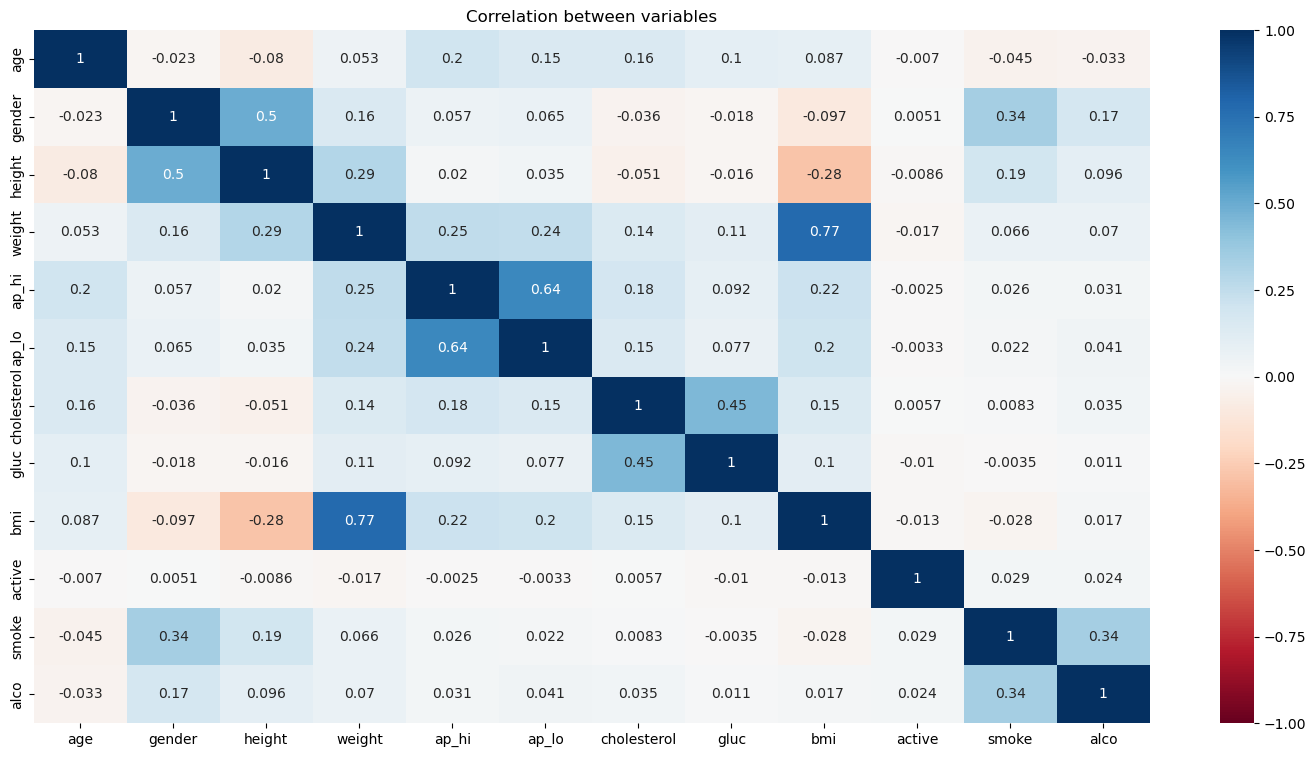

In [15]:
#plotting a heatmap to check the correlation between the variables

cols = body + disease +  ['bmi'] + health + habit
plt.figure(figsize=(18, 9))

#nomralizing the color scale

sns.heatmap(train[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

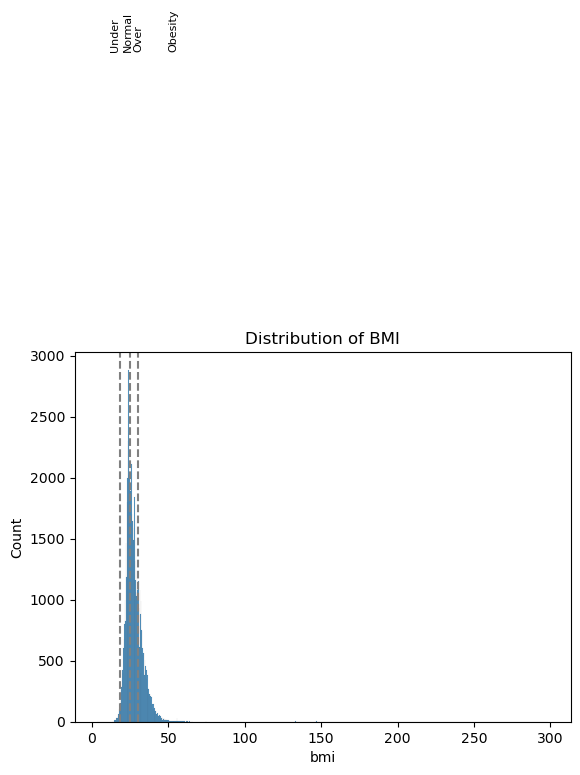

In [16]:
#plotting the distribution of BMI  

#The World Health Organization (WHO) defines the following BMI ranges for adults:

#Underweight: BMI less than 18.5
#Normal weight: BMI between 18.5 and 24.9
#Overweight: BMI between 25 and 29.9
#Obesity: BMI of 30 or greater

plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

#add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(data['bmi'], kde=False)

plt.title('Distribution of BMI')
plt.show()

In [17]:
#split training dataset to validation datasetset
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2, random_state=0)

In [78]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Correlation
3,ap_hi,0.073515
4,ap_lo,0.048143
6,gluc,0.035551
5,cholesterol,0.020011
1,height,0.008969
7,smoke,0.006024
0,gender,0.000151
8,alco,-0.000064
9,active,-0.001340
10,bmi,-0.011030


In [19]:
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

71.75

In [20]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

71.63

In [21]:
predicted=logreg.predict(test)
predicted1=logreg.predict(train)
confusion_matrix(target_test, predicted)

array([[5387, 1660],
       [2254, 4496]], dtype=int64)

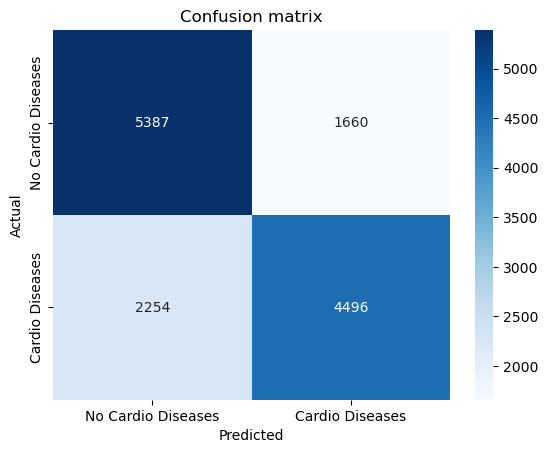

In [22]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.yticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.title('Confusion matrix')
plt.show()

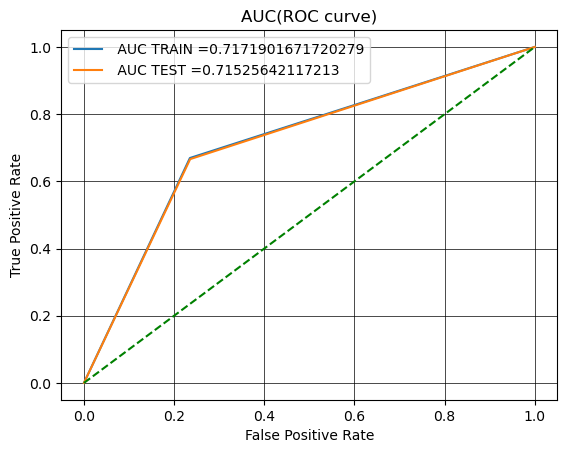

In [23]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

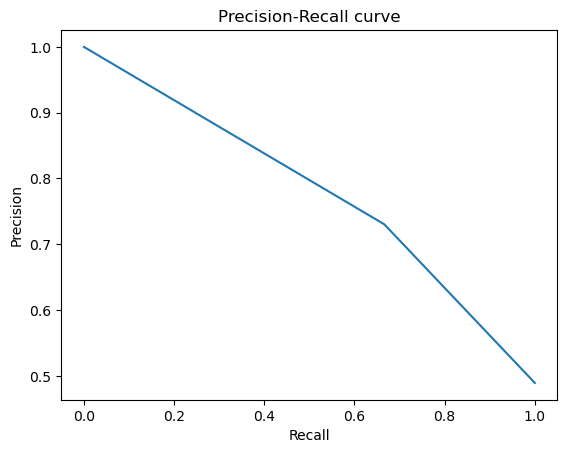

In [24]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [25]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

51.42

In [26]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

52.12

In [27]:
predicted=perceptron.predict(test)
predicted1=perceptron.predict(train)
confusion_matrix(target_test, predicted)

array([[7010,   37],
       [6569,  181]], dtype=int64)

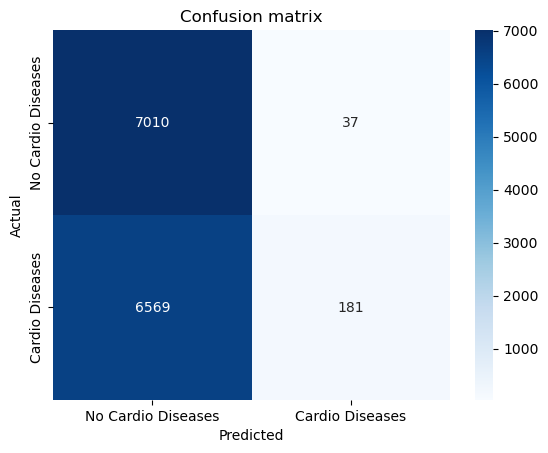

In [28]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.yticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.title('Confusion matrix')
plt.show()

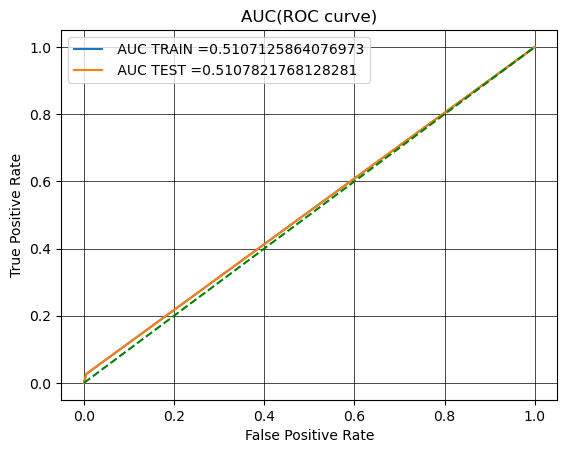

In [29]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

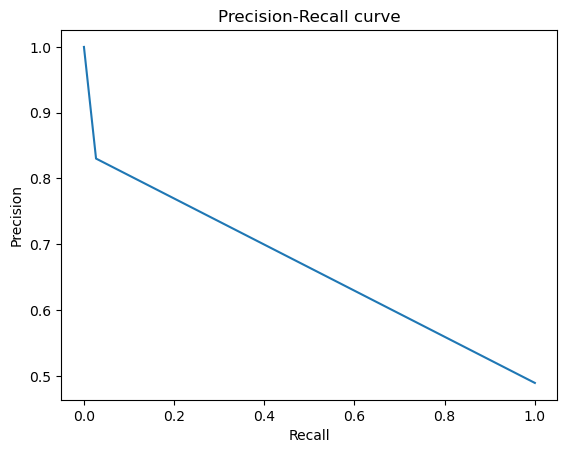

In [30]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [31]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

70.24

In [32]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

70.32

In [33]:
predicted=gaussian.predict(test)
predicted1=gaussian.predict(train)
confusion_matrix(target_test, predicted)

array([[5654, 1393],
       [2702, 4048]], dtype=int64)

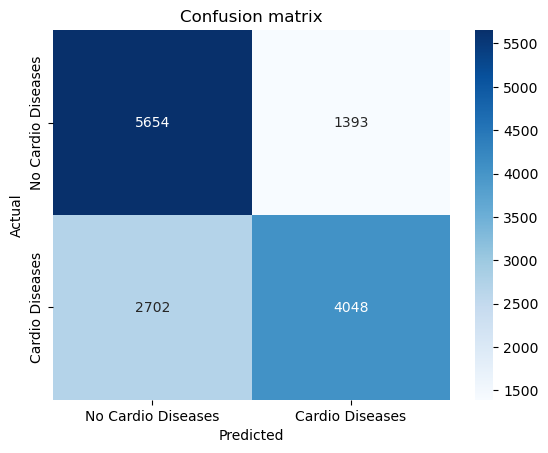

In [34]:
cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.yticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.title('Confusion matrix')
plt.show()

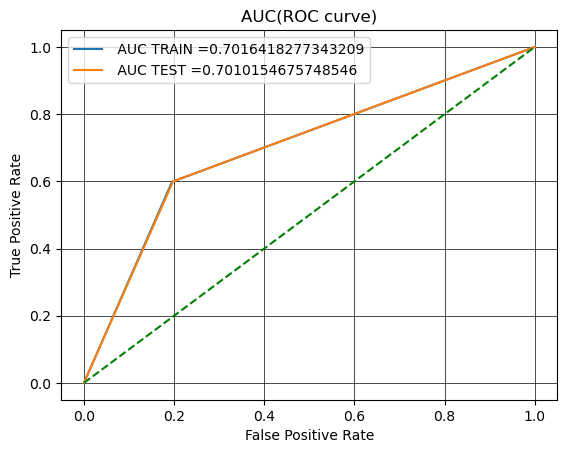

In [35]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

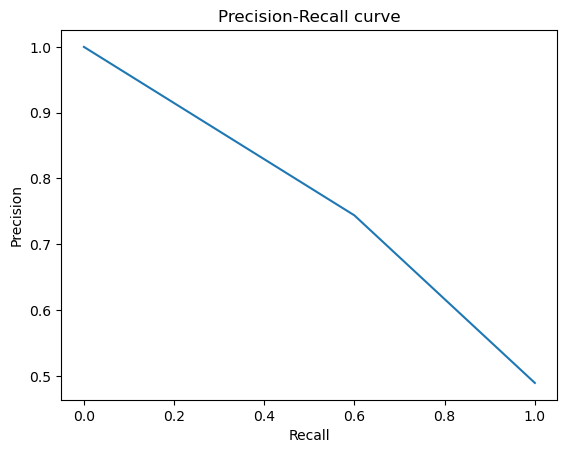

In [36]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [37]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

99.98

In [38]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

63.88

In [39]:

predicted=decision_tree.predict(test)
predicted1=decision_tree.predict(train)
confusion_matrix(target_test, predicted)

array([[4528, 2519],
       [2464, 4286]], dtype=int64)

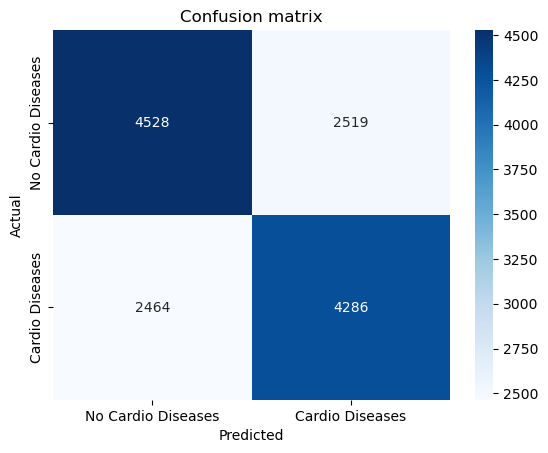

In [40]:

cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.yticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.title('Confusion matrix')
plt.show()

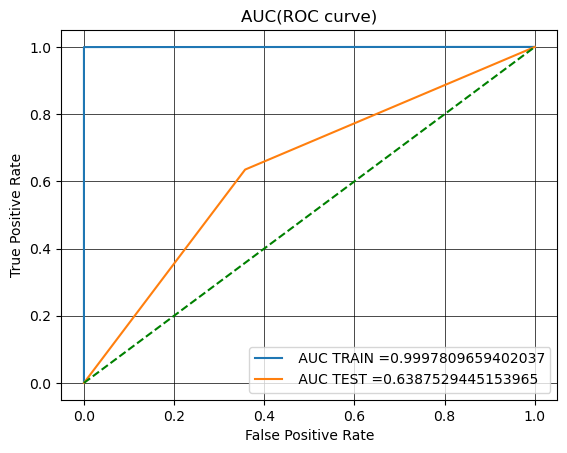

In [41]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

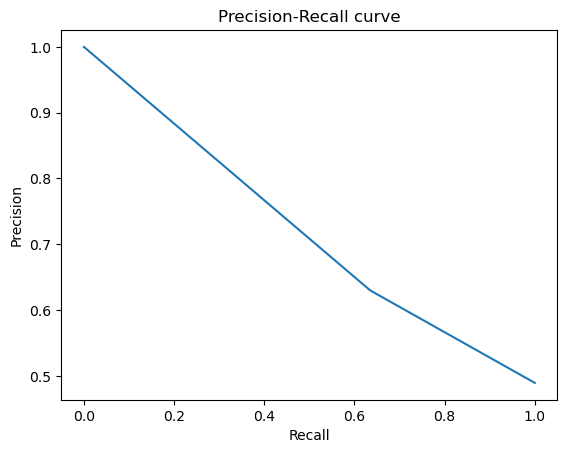

In [42]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [43]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

99.98 {'n_estimators': 300}


In [44]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

71.1

In [45]:

predicted=random_forest.predict(test)
predicted1=random_forest.predict(train)
confusion_matrix(target_test, predicted)

array([[5079, 1968],
       [2020, 4730]], dtype=int64)

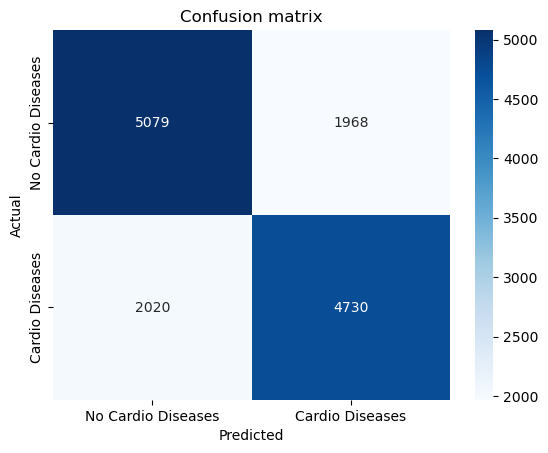

In [46]:

cm = confusion_matrix(target_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.yticks([0.5, 1.5], ['No Cardio Diseases', 'Cardio Diseases'])
plt.title('Confusion matrix')
plt.show()

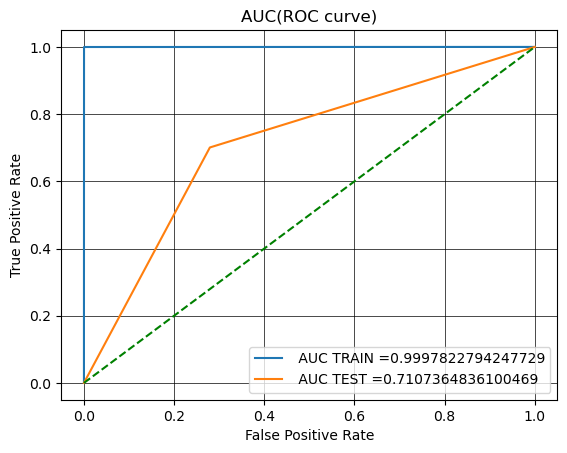

In [47]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, tr_thresholds = roc_curve(target, predicted1)
test_fpr, test_tpr, te_thresholds = roc_curve(target_test, predicted)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

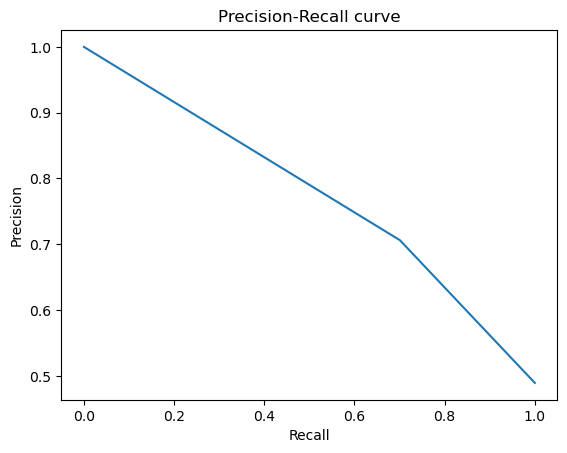

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(target_test, predicted)
plt.plot(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve");

In [71]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Perceptron', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest'],
    
    'Score_train': [acc_log, acc_perceptron, acc_gaussian, acc_decision_tree, acc_random_forest],
    'Score_test': [acc_test_log, acc_test_perceptron, acc_test_gaussian, acc_test_decision_tree, acc_test_random_forest]})

In [50]:
#creating a function to evaluate the model

def evaluate_model(models, train, target, test, target_test):
    model.fit(train, target)
    target_pred = model.predict(train)
    target_test_pred = model.predict(test)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(target, target_pred)],
                        'train_precision': [precision_score(target, target_pred)],
                        'train_recall': [recall_score(target, target_pred)],
                        'train_f1': [f1_score(target, target_pred)],
                        'train_roc_auc': [roc_auc_score(target, target_pred)],
                        
                        'test_accuracy': [accuracy_score(target_test, target_test_pred)],
                        'test_precision': [precision_score(target_test, target_test_pred)],
                        'test_recall': [recall_score(target_test, target_test_pred)],
                        'test_f1': [f1_score(target_test, target_test_pred)],
                        'test_roc_auc': [roc_auc_score(target_test, target_test_pred)]})
    return df

In [65]:
#Finding Precision, Accuracy, F-score, Recall and ROC-AUC

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Perceptron': Perceptron(),
    'Naive Bayes': GaussianNB(),
}

results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, train, target, test, target_test)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
results.sort_values(by='test_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,model
0,0.717537,0.737382,0.669332,0.701711,0.717190,0.716315,0.730344,0.666074,0.696730,0.715256,Logistic Regression
2,0.999746,0.999890,0.999598,0.999744,0.999745,0.710879,0.706816,0.698963,0.702868,0.710628,Random Forest
4,0.702388,0.751248,0.598657,0.666328,0.701642,0.703196,0.743981,0.599704,0.664096,0.701015,Naive Bayes
1,0.999783,1.000000,0.999562,0.999781,0.999781,0.637240,0.627614,0.635704,0.631633,0.637208,Decision Tree
3,0.514225,0.844523,0.026175,0.050775,0.510713,0.521200,0.830275,0.026815,0.051952,0.510782,Perceptron


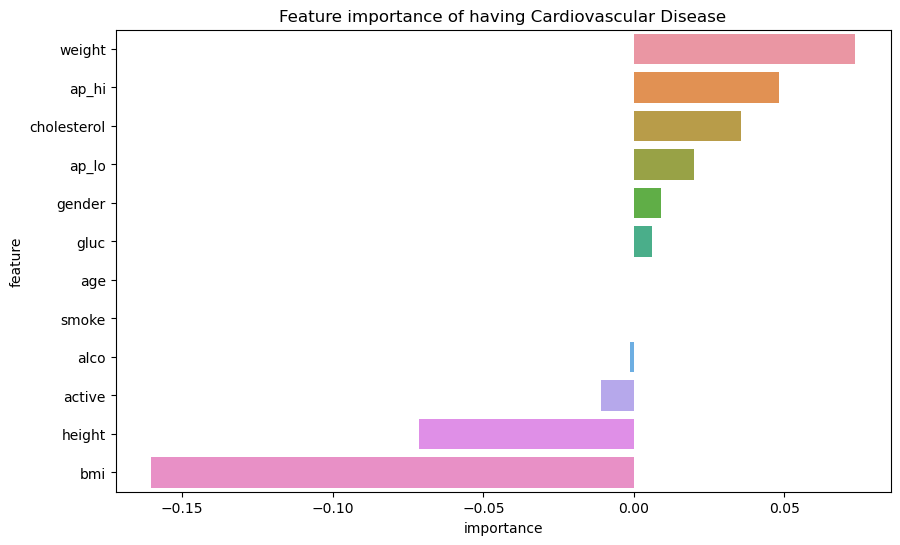

In [67]:
feature_importance = pd.DataFrame({'feature': data.columns, 'importance': logreg.coef_[0]})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having Cardiovascular Disease')
plt.show()

In [73]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
4,Random Forest,99.98,71.10
3,Decision Tree Classifier,99.98,63.88
0,Logistic Regression,71.75,71.63
2,Naive Bayes,70.24,70.32
1,Perceptron,51.42,52.12


In [74]:
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

,Model,Score_train,Score_test,Score_diff
2,Naive Bayes,70.24,70.32,0.08
0,Logistic Regression,71.75,71.63,0.12
1,Perceptron,51.42,52.12,0.70
4,Random Forest,99.98,71.10,28.88
3,Decision Tree Classifier,99.98,63.88,36.10


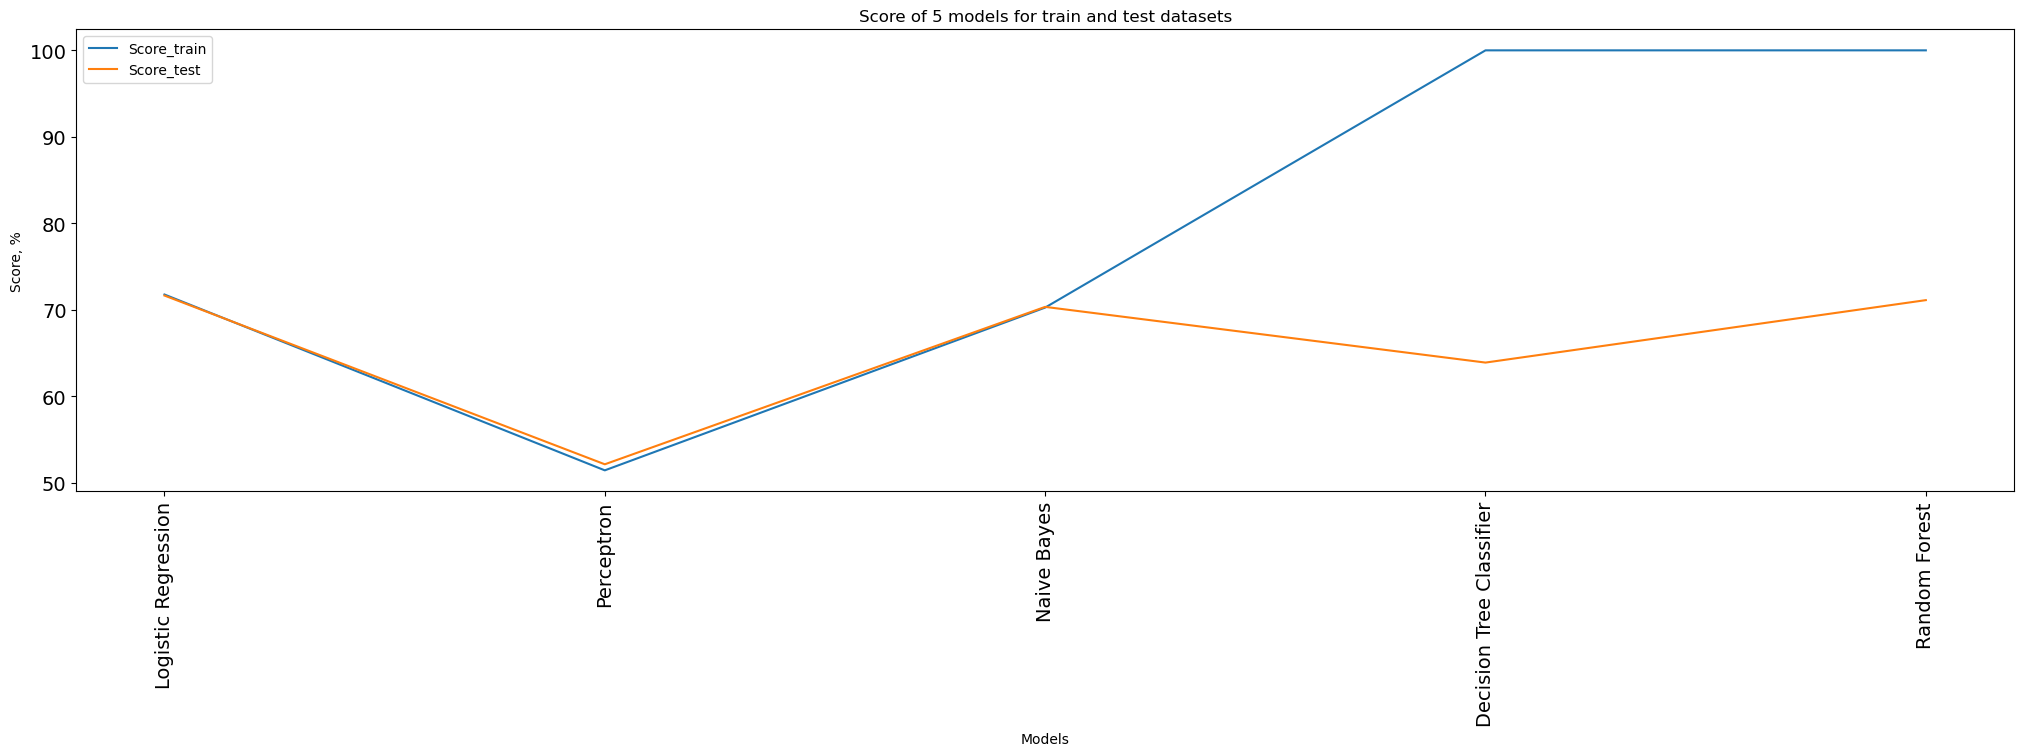

In [75]:
# Plotting the accuracy of each model
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 5 models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()